# CHEE 426 Project 1
Spring 2024

This is a demonstration of how to work on the Project 1. Use this notebook as a guide or template.

This is based on the textbook notebook for Chapter 2.

## Problem Statement:

This Project 1 for the course is the application of the concepts and techniques for the materials covered in Chapter 1 and 2. The problem you have to solve is to develop a regression model for the prediction of CO emissions of light-duty vehicles by training on the fuel economy dataset collected by US-EPA for vehicle model year 2024. 

## Import Python Modules (packages) 
Packages are where we will get functions to use in the workflow.

In [1]:
# Make sure that the Kernel you are using is the environment you created for this project.
# Any imports of Pyhton modules may result to error if your Kernel is not your intended environment
#
# The current Kernel is shown i the Upper-right corner of this notebook.
# To change Kernel: Menu > Kernel > Change Kernel... > click drop-down and select the name of the environment you created for the project
# The default Kernel in a Jupyter Notebook is the base(root) Python


import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Import Data

In [2]:
# Make sure the the CSV file of the data 'proj1data.csv' is in the same folder as this notebook file.

df = pd.read_csv('proj1dataGOOD1.csv')
len(df)

2648

## Preprocess and Prepare Data

In [3]:
df.head()

,CO (g/mi),Drive System Description,Tested Transmission Type,Veh Mfr Code,Rated Horsepower,# of Cylinders and Rotors,# of Gears,Test Category,THC (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi)
0,0.536,"2-Wheel Drive, Rear",Automatic,ASX,680,8.0,8,FTP,0.0256,484.329,0.008,NaN,0.0089,0.0039
1,0.040,"2-Wheel Drive, Rear",Automatic,ASX,680,8.0,8,HWY,0.0007,283.235,0.007,NaN,NaN,NaN
2,0.120,4-Wheel Drive,Automatic,ASX,550,8.0,9,FTP,0.0146,521.260,0.009,NaN,0.0028,NaN
3,0.000,4-Wheel Drive,Automatic,ASX,550,8.0,9,HWY,0.0000,327.540,0.002,NaN,NaN,NaN
4,0.150,4-Wheel Drive,Automatic,ASX,707,8.0,9,FTP,0.0156,486.750,0.011,0.0004,0.0040,NaN


In [4]:
# chekc column names: note that each dataset has its own set column names so check the colnames verytime
df.columns

Index(['CO (g/mi)', 'Drive System Description', 'Tested Transmission Type',
       'Veh Mfr Code', 'Rated Horsepower', '# of Cylinders and Rotors',
       '# of Gears', 'Test Category', 'THC (g/mi)', 'CO2 (g/mi)', 'NOx (g/mi)',
       'PM (g/mi)', 'CH4 (g/mi)', 'N2O (g/mi)'],
      dtype='object')

In [5]:
################################################
# Stumbling block a bit here (above).
# The column names are not good for Pyhotn code due to the special characters. More challenging than the author textbook demo.
#
# We have to remove some unwanted characters in addiiton ot 'white space' such as: (, ), /, **
#
# We can do this using Pandas function str.replace() with the argument: ('[^\w]','', regex=True)
# That is, replace everything other than \w . \w Matches alphanumeric characters and the underscore, _.
#
# If you wonder how to know what to do in cases like this challenging one. Google it! No kidding. There is a wide
# community of Python coders doing ML all around the world. There are online forums where issues/challenges and solutions
# are being exhanged. This is still way better than ChatGPT (at least for now). 
# Or, if you are very patient, check the documentation of Pandas
#
################################################

df.columns = df.columns.str.lower().str.replace(' ','_', regex=True) # replace all spaces with '_'
df.columns = df.columns.str.lower().str.replace('[^\w]','', regex=True) # then remove all spacial characters


In [6]:
# chekc column names to verify no unwanted characters in colnames
df.columns

Index(['co_gmi', 'drive_system_description', 'tested_transmission_type',
       'veh_mfr_code', 'rated_horsepower', '_of_cylinders_and_rotors',
       '_of_gears', 'test_category', 'thc_gmi', 'co2_gmi', 'nox_gmi', 'pm_gmi',
       'ch4_gmi', 'n2o_gmi'],
      dtype='object')

In [7]:
df.head()

,co_gmi,drive_system_description,tested_transmission_type,veh_mfr_code,rated_horsepower,_of_cylinders_and_rotors,_of_gears,test_category,thc_gmi,co2_gmi,nox_gmi,pm_gmi,ch4_gmi,n2o_gmi
0,0.536,"2-Wheel Drive, Rear",Automatic,ASX,680,8.0,8,FTP,0.0256,484.329,0.008,NaN,0.0089,0.0039
1,0.040,"2-Wheel Drive, Rear",Automatic,ASX,680,8.0,8,HWY,0.0007,283.235,0.007,NaN,NaN,NaN
2,0.120,4-Wheel Drive,Automatic,ASX,550,8.0,9,FTP,0.0146,521.260,0.009,NaN,0.0028,NaN
3,0.000,4-Wheel Drive,Automatic,ASX,550,8.0,9,HWY,0.0000,327.540,0.002,NaN,NaN,NaN
4,0.150,4-Wheel Drive,Automatic,ASX,707,8.0,9,FTP,0.0156,486.750,0.011,0.0004,0.0040,NaN


# Exploratory data analysis

C:\Users\carly\anaconda3\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


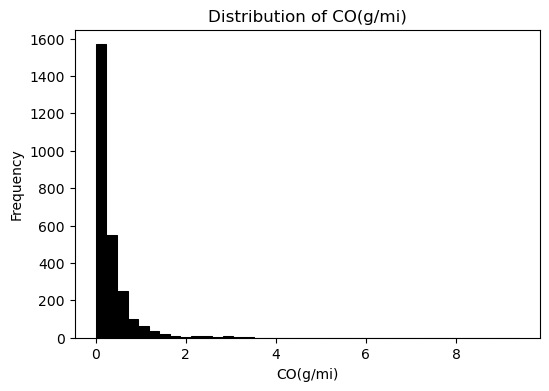

In [8]:
# Let us look at the distribution of values in the targte output Y whihc is CO
plt.figure(figsize=(6, 4))

sns.histplot(df.co_gmi, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('CO(g/mi)')
plt.title('Distribution of CO(g/mi)')

plt.show()

C:\Users\carly\anaconda3\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


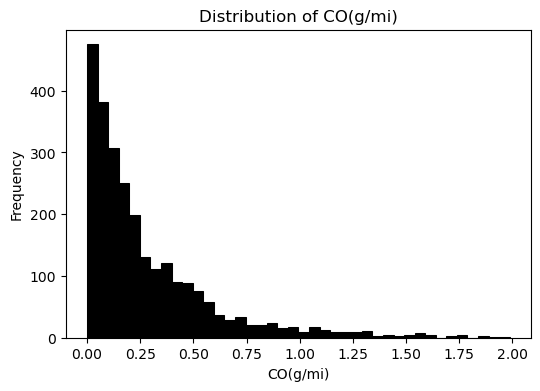

In [9]:
# Let's see the distribution at the lower values of CO

plt.figure(figsize=(6, 4))

sns.histplot(df.co_gmi[df.co_gmi < 2], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('CO(g/mi)')
plt.title('Distribution of CO(g/mi)')

plt.show()

C:\Users\carly\anaconda3\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


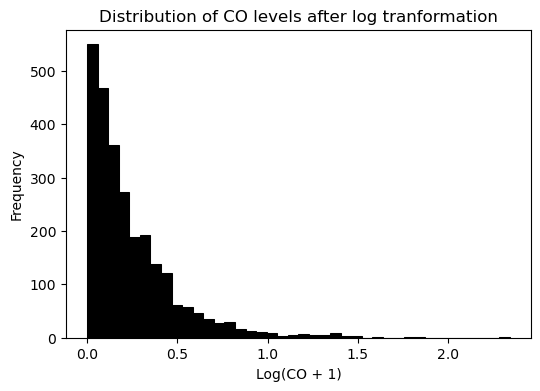

In [10]:
log_co = np.log1p(df.co_gmi)

plt.figure(figsize=(6, 4))

sns.histplot(log_co, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(CO + 1)')
plt.title('Distribution of CO levels after log tranformation')

plt.show()

# Based on the graph below, log-transformation does not signficantly change the look of CO distribution, 
# so log-transform on CO will not have significant improvement effect on the eventual model

In [11]:
# Check for NULL or NA, or NaN values in each column in the dataset 
df.isnull().sum()

co_gmi                         0
drive_system_description       0
tested_transmission_type       0
veh_mfr_code                   0
rated_horsepower               0
_of_cylinders_and_rotors       4
_of_gears                      0
test_category                  0
thc_gmi                        0
co2_gmi                        0
nox_gmi                       15
pm_gmi                      2174
ch4_gmi                      350
n2o_gmi                     1061
dtype: int64

## Validation framework

In [12]:
# Set random number seed for reproducility of results by other users of the notebook
np.random.seed(2)


# Since the target var CO cannot have NULL values, let's remove the rows (data-points) that have CO=NULL or NaN or NA
# We have to do this before we perform the succeeding steps of splitting the dataset

df = df.dropna(subset = ['co_gmi'])

# Now splitting the dataset using 20% for Test set and the remianing 80% for Train+Val set
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()



#### Potential Questions at this stage for Exam 1:
1. How many data samples are there in the Test set?
2. How many data samples are there in the Train set?
3. How many data samples are there in the Validation set?

Use Python function to compute the answers to the questions above.

In [13]:
# Note: The target Y for your Poject 1 is CO (g/mi)

y_train_orig = df_train.co_gmi.values
y_val_orig = df_val.co_gmi.values
y_test_orig = df_test.co_gmi.values

# no need for log-transform as shown above, so we just equate the vars
y_train = y_train_orig
y_val = y_val_orig
y_test = y_test_orig

# since CO is a Y variable, then delete it from the pool of potential X variables
del df_train['co_gmi']
del df_val['co_gmi']
del df_test['co_gmi']

## Linear Regression

In [14]:
# This is the linear regression algorithm (closed-form formula to compute the linear model coefficients)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Baseline solution

In [15]:
# This is where you select your predicror variables or X variables.
# Remember your project constraint: use at least 10 X varibales (except CO(g/mi) or course), and at least 1 X-var is a categorical var
# How to know which X-var to select? Check the PDF document of Variable Definition, which is also uploaded in Moodle under Project 1
#

base = ['test_veh_displacement_l', # this is the engine cylinder displacement
        'rated_horsepower', # thisis the horsepower rating
        'axle_ratio', # thi sis the axle ratio
        'nv_ratio', # this is the N/V ratio
        #'vehicle_type' # this is the Categorical variable Vehicle type, but let us exclude it for now in the baseline model (only numeric X vars)
       ]

In [16]:
def prepare1_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [17]:
X_train = prepare1_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

KeyError: "['test_veh_displacement_l', 'axle_ratio', 'nv_ratio'] not in index"

In [ ]:
y_train

In [ ]:
w_0

In [ ]:
y_pred = w_0 + X_train.dot(w)

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

In [ ]:
X_val = prepare1_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [ ]:
rmse(y_val, y_pred)

## Simple feature engineering
Let use now include the 1 Categorical variable into the model as an X var.
I chose for this demo the variable VEHICLE TYPE with column name 'vehicle_type'. This is a categorical data, so we have to convert this to numeric data.
To convert to numeric, we use the "One-Hot Encoding" technique.

In [ ]:
df['vehicle_type'].value_counts().head(5)

You see above that 'vehicle_type' has 3 levels or categories: Truck, Car, Both.
Let us use these levels for One-Hot Encoding.

Also, I will give a different name to this preparation function so it is not confused with baseline prepare1_X() function above.

In [ ]:
def prepare2_X(df):
    df = df.copy()
    features = base.copy()

    for v in ['Truck', 'Car', 'Both']:
        feature = 'is_type_%s' % v
        df[feature] = (df['vehicle_type'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
# Running preparation
X_train = prepare2_X(df_train)


In [ ]:
# Chekcing if the one-hot encoding really worked
# note: X_train is now a numpy array. The prepare2_X() function has 'X = df_num.values', 
# which outputs only the values and no column names attached. 
# The added on-hot coding columns are at the end of the numpy array.
# Notice the numbers, 1 and 0, as indicators of presence and absence of the feature

X_train

In [ ]:
# Verify that there are now seven X vars: 'test_veh_displacement_l', 
#                                            'rated_horsepower',
#                                            'axle_ratio', 
#                                            'nv_ratio',
#                                            'is_type_Trucks',
#                                            'is_type_Cars',
#                                            'is_type_Boths',

X_train.shape

## Training Another Linear Regression Model 
Now including the VEHICLE TYPE variable.

In [ ]:

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

#### Demo Remarks
So, this is an illustration of how to adapt a template Jupyter Notebook to a new project and new dataset.

This is what you do in your Porject 1. And of course you can use this notebook as your template.

Make sure to continue in the next steps to include Regulatization in the model fitting.

## Regularization

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
X_train = prepare2_X(df_train)

In [ ]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[2]))

In [ ]:
X_train = prepare2_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

In [ ]:
X_train = prepare2_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

In [ ]:
X_train = prepare2_X(df_train)
X_val = prepare2_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

In [ ]:
X_train = prepare2_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare2_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

## Using the model

In [ ]:
# Let us select a vehicle in the Test set to predict its CO emission
# with index=2, this is a 2024, Mercedes-Benz, Model: CLA 250 4MATIC

i = 2
ad = df_test.iloc[i].to_dict()
ad

In [ ]:
X_test = prepare2_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
co_gmi_predicted = np.expm1(y_pred)
co_gmi_predicted

In [ ]:
# Here is the value of the observed CO(g/mi) in data sample i=2 in Y-test set
co_gmi_observed = y_test[i]
co_gmi_observed

### Final Remarks

These final results,co_gmi_predicted and co_gmi_observed, must now be assessed by an Environmental Engineer via domain-knowledge to decide if the model is accurate enough in its predictions.

Of course, you can go back up and try to improve your model:
1. What if you use a different set of X-variables?
2. What if a data transformation such as log-transformation is implememented on the data X and/or Y vars?
3. What if you group the main dataset according to certain obvious factor such as test-Fuel type?
4. And many more...usually with the input of other experts. Some publications about the subject might also help you on how to improve your model.